In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
import datetime
import cv2
import cufflinks as cf


from chart_studio import plotly as py 
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
from pandas_datareader import data,wb
%matplotlib inline

Data Gathering

In [79]:
ad_data = pd.read_csv(r".\Data\Advertising.csv")

Data Processing

In [80]:
ad_data.head()

Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                     68.95   35  ...  2016-03-27 00:53:11              0
1                     80.23   31  ...  2016-04-04 01:39:02              0
2                     69.47   26  ...  2016-03-13 20:35:42              0
3                     74.15   29  ...  2016-01-10 02:31:19              0
4                     68.37   35  ...  2016-06-03 03:36:18              0

[5 rows x 10 columns]

In [81]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [82]:
ad_data.describe()

Daily Time Spent on Site          Age  ...         Male  Clicked on Ad
count               1000.000000  1000.000000  ...  1000.000000     1000.00000
mean                  65.000200    36.009000  ...     0.481000        0.50000
std                   15.853615     8.785562  ...     0.499889        0.50025
min                   32.600000    19.000000  ...     0.000000        0.00000
25%                   51.360000    29.000000  ...     0.000000        0.00000
50%                   68.215000    35.000000  ...     0.000000        0.50000
75%                   78.547500    42.000000  ...     1.000000        1.00000
max                   91.430000    61.000000  ...     1.000000        1.00000

[8 rows x 6 columns]

<AxesSubplot:ylabel='Frequency'>

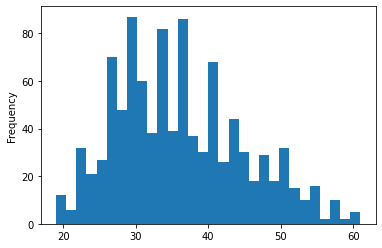

In [83]:
ad_data['Age'].plot.hist(bins=30)

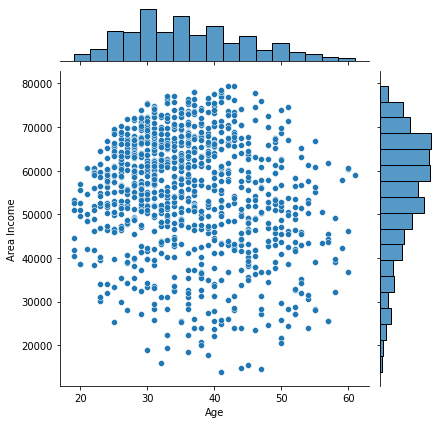

In [84]:
sns.jointplot(data=ad_data,x="Age",y="Area Income")

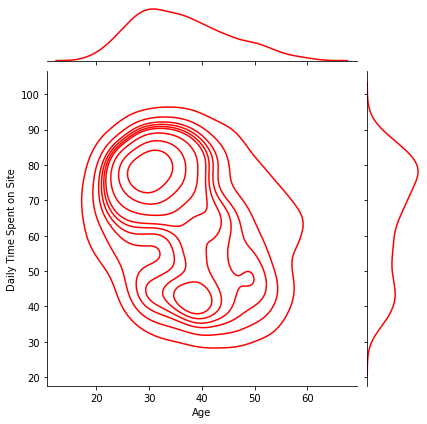

In [85]:
sns.jointplot(data=ad_data, x="Age", y="Daily Time Spent on Site",kind="kde", color="red")

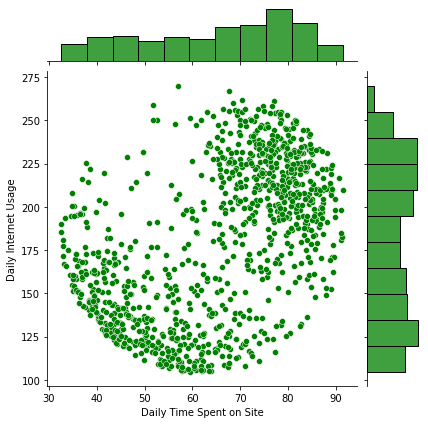

In [86]:
sns.jointplot(data=ad_data, x="Daily Time Spent on Site", y="Daily Internet Usage",color="green")

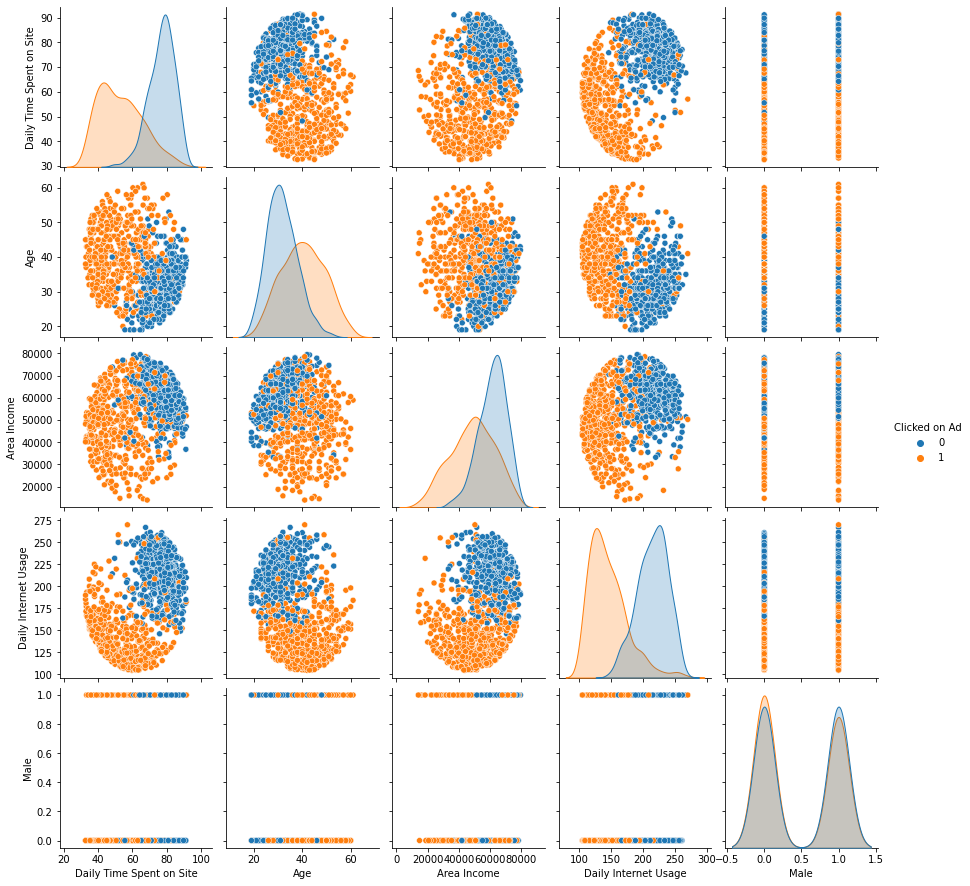

In [87]:
sns.pairplot(ad_data,hue='Clicked on Ad')

Feature selection

In [88]:
feature = ad_data[["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage","Male"]]

In [89]:
target = ad_data[["Clicked on Ad"]]

Data Spliting

In [90]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,target, test_size=0.3, random_state=101)

In [91]:
xtrain.shape, xtest.shape

((700, 5), (300, 5))

In [92]:
ytrain.shape, ytest.shape

((700, 1), (300, 1))

Modeling

In [93]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(xtrain,ytrain.values.ravel())

LogisticRegression()

In [94]:
print(lm.intercept_)

[0.00510587]


In [95]:
lm.coef_

array([[-5.12426791e-02,  2.36157646e-01, -9.89647744e-06,
        -2.46826887e-02,  1.07736310e-03]])

Predictions and Evaluations

In [96]:
predictions = lm.predict(xtest)

Classification report for the model

In [97]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [98]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,predictions))

[[149   8]
 [ 14 129]]


conclusions

In [99]:
from sklearn import metrics

In [100]:
print("MAE :", metrics.mean_absolute_error(ytest,predictions))
print("MSE :", metrics.mean_squared_error(ytest,predictions))
print("RMSE :", np.sqrt(metrics.mean_squared_error(ytest,predictions)))
print("R2S :", metrics.r2_score(ytest,predictions))

MAE : 0.07333333333333333
MSE : 0.07333333333333333
RMSE : 0.27080128015453203
R2S : 0.7060264576188143


In [101]:
metrics.explained_variance_score(ytest,predictions)

0.7076299496681663

In [102]:
# cdf = pd.DataFrame(lm.coef_ ,feature.columns,columns=['coeff'])